# **Georeferenciación manzanas**

## **Librerías y modulos necesarios**

In [29]:
import os 
import folium
import warnings
import pandas as pd
import seaborn as sns
import geopandas as gpd
from funciones.boxplot_manzanas import *
from funciones.countplot_manzanas import *
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from folium import GeoJson, GeoJsonTooltip
sns.set(style="whitegrid", palette="pastel")

## **Shapefile de las manzanas**

Inicialmente, importamos el conjunto de datos correspondiente a la ubicación de las manzanas de **Colombia**

In [2]:
ruta = r"C:\Users\CCOSTA397\OneDrive\Desktop\CIDEACC\convocatoria38\raw_data\MGN2024_MANZANA\MGN_URB_MANZANA.shp"
manzanas = gpd.read_file(ruta)
manzanas.head(2)

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,clas_ccdgo,setr_ccdgo,setr_ccnct,secr_ccdgo,secr_ccnct,zu_ccdgo,zu_cdivi,...,ano_actlz,revi_campo,manz_narea,manz_lati,manz_long,manz_viv,shape_Leng,shape_Area,FT_ACT_VIV,geometry
0,05,154,05154,1,000,051541000,00,05154100000,000,05154000,...,0,None,1333.254889,7.962632,-75.176358,1,0.001607,1.093000e-07,VIV_CNPV2018,"POLYGON ((-75.17666 7.9627, -75.17602 7.96274,..."
1,50,245,50245,2,001,502452001,02,50245200102,002,50245002,...,0,None,1719.092957,4.378770,-73.759133,15,0.001549,1.400500e-07,VIV_CNPV2018,"POLYGON ((-73.75941 4.37873, -73.75931 4.379, ..."


In [3]:
manzanas.shape

(535190, 37)

Al ver el tamaño del conjunto de datos, notamos que se encuentran **533.190** observaciones en total. Lo que quiere decir que en Colombia hay **533.190** manzanas en Colombia.

## **Organización del conjunto de datos**

### **Variables de interés**

In [4]:
manzanas.columns

Index(['dpto_ccdgo', 'mpio_ccdgo', 'mpio_cdpmp', 'clas_ccdgo', 'setr_ccdgo',
       'setr_ccnct', 'secr_ccdgo', 'secr_ccnct', 'zu_ccdgo', 'zu_cdivi',
       'setu_ccdgo', 'setu_ccnct', 'secu_ccdgo', 'secu_ccnct', 'manz_ccdgo',
       'manz_ccnct', 'manz_cag', 'tipo_ctstr', 'cod_ctstr', 'manz_nano',
       'manz_nid', 'manz_nfe', 'manz_tipo', 'fuen_actlz', 'tipo_imgn',
       'ano_fuente', 'tipo_actlz', 'ano_actlz', 'revi_campo', 'manz_narea',
       'manz_lati', 'manz_long', 'manz_viv', 'shape_Leng', 'shape_Area',
       'FT_ACT_VIV', 'geometry'],
      dtype='object')

In [5]:
columnas_eliminar = ['FT_ACT_VIV','revi_campo', 'tipo_actlz', 'ano_fuente', 'ano_actlz', 'tipo_imgn', 
                     'fuen_actlz', 'manz_nfe' ,'manz_nid','manz_nano', 'tipo_ctstr', 'cod_ctstr']
manzanas.drop(columnas_eliminar, axis=1, inplace=True)

In [6]:
columnas_de_interes = [
    'dpto_ccdgo','mpio_ccdgo','mpio_cdpmp','clas_ccdgo','manz_ccdgo','manz_ccnct','manz_cag',
    'manz_tipo','manz_narea','manz_lati','manz_long','manz_viv','shape_Leng','shape_Area','geometry']
manzanas = manzanas[columnas_de_interes]

### **Renombrado de categorías**

In [7]:
manzanas['clas_ccdgo'] = manzanas['clas_ccdgo'].replace({'1':'Urbano', '2':'Rural'})
manzanas['manz_tipo'] = manzanas['manz_tipo'].replace({'1':'Manzana Parque', '2':'Manzana Zona Verde', 
                                                       '3':'Manzana Alameda','4':'Manzana Separador vial',
                                                       '5':'Manzana predominantemente Residencial', '6':'Manzana predominantemente Comercial',
                                                       '7':'Manzana predominantemente Industrial', '8':'Manzana predominantemente de Servicios'})

[Diccionario de variables](https://cideacc.github.io/datos_externos_convocatoria38/anexos.html#georeferenciacion-de-las-manzanas)


## **Código DANE de la manzana:  `COD_DANE_ANM`**

Verifiquemos que en efecto el código de las manzanas coincide con los datos que se tienen del Censo Nacional de vivienda realizado en 2018.

In [8]:
manzanas_filtradas = manzanas[manzanas['manz_ccnct'] == '1300110000000023010104']
manzanas_filtradas

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,clas_ccdgo,manz_ccdgo,manz_ccnct,manz_cag,manz_tipo,manz_narea,manz_lati,manz_long,manz_viv,shape_Leng,shape_Area,geometry
297326,13,001,13001,Urbano,04,1300110000000023010104,220109,None,9730.38198,10.407975,-75.515979,40,0.003789,8.028900e-07,"POLYGON ((-75.51558 10.40799, -75.51569 10.407..."


## **Rural vs Urbano**

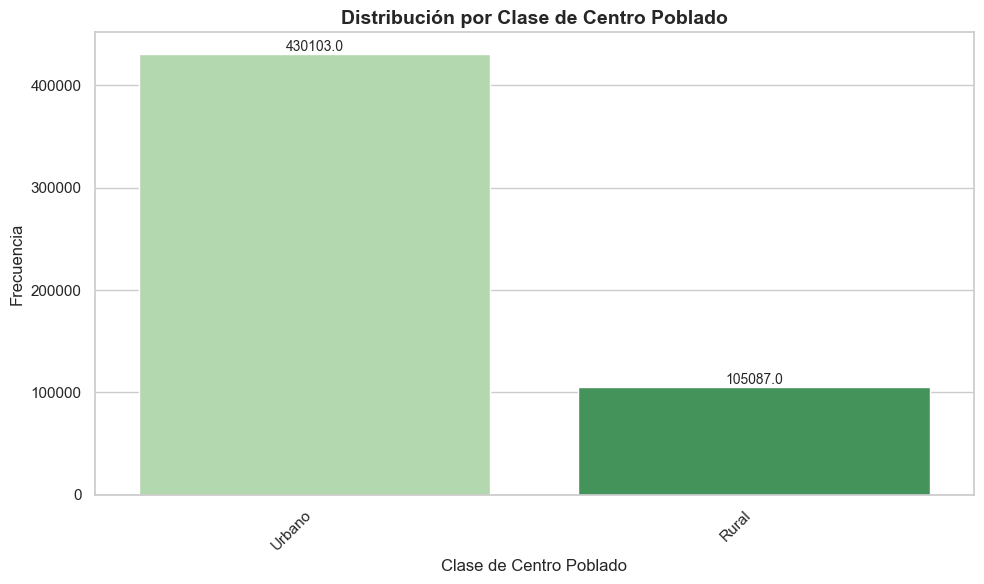

In [9]:
graficar_countplot(manzanas, 'clas_ccdgo', 'Distribución por Clase de Centro Poblado', 'Clase de Centro Poblado')

## **Filtración: Región Caribe**

In [10]:
region_caribe_codigos = ['08', '13', '20', '23', '44', '47', '70', '88']
manzanas_caribe = manzanas[manzanas['dpto_ccdgo'].isin(region_caribe_codigos)]

In [11]:
manzanas_caribe.head(2)

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,clas_ccdgo,manz_ccdgo,manz_ccnct,manz_cag,manz_tipo,manz_narea,manz_lati,manz_long,manz_viv,shape_Leng,shape_Area,geometry
3,13,001,13001,Rural,16,1300120041000500010416,228724,None,2018.575094,10.325344,-75.577612,8,0.001638,1.665100e-07,"POLYGON ((-75.57748 10.32562, -75.57736 10.325..."
24,70,742,70742,Urbano,19,7074210000000000020119,213342,None,606.682716,9.248260,-75.138194,0,0.001016,4.990000e-08,"POLYGON ((-75.13799 9.24816, -75.13839 9.24822..."


In [12]:
manzanas_caribe.shape

(157603, 15)

### **Rural vs Urbano (Región Caribe)**

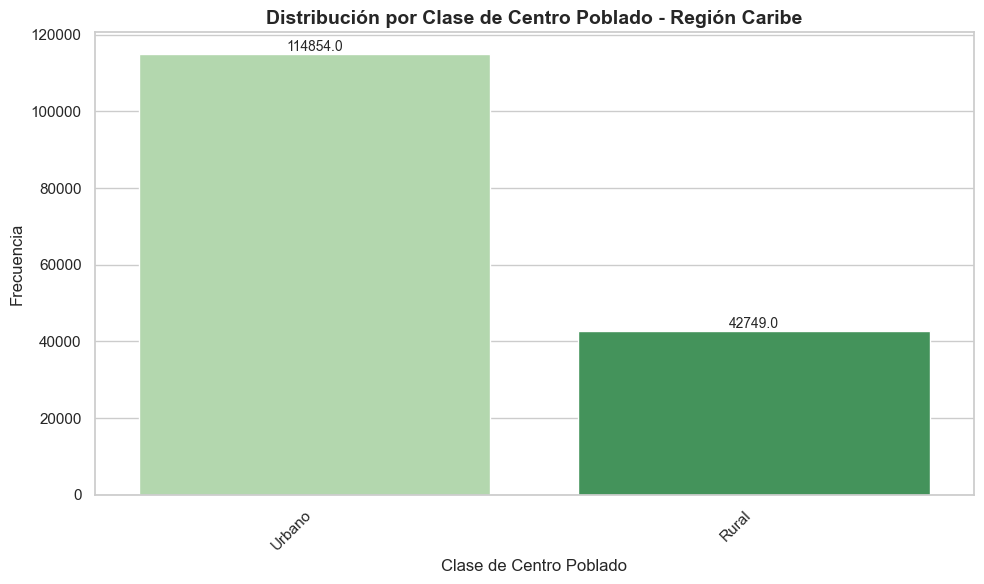

In [13]:
graficar_countplot(manzanas_caribe, 'clas_ccdgo', 'Distribución por Clase de Centro Poblado - Región Caribe', 'Clase de Centro Poblado')

### **Frecuencia de manzanas por departamento**

In [14]:
manzanas_caribe['dpto_ccdgo'] = manzanas_caribe['dpto_ccdgo'].astype(str).str.zfill(2)
divipola_caribe = {"08": "Atlántico","13": "Bolívar","20": "Cesar","23": "Córdoba","44": "La Guajira",
    "47": "Magdalena","70": "Sucre","88": "San Andrés"}

manzanas_caribe['dpto_ccdgo'] = manzanas_caribe['dpto_ccdgo'].map(divipola_caribe)

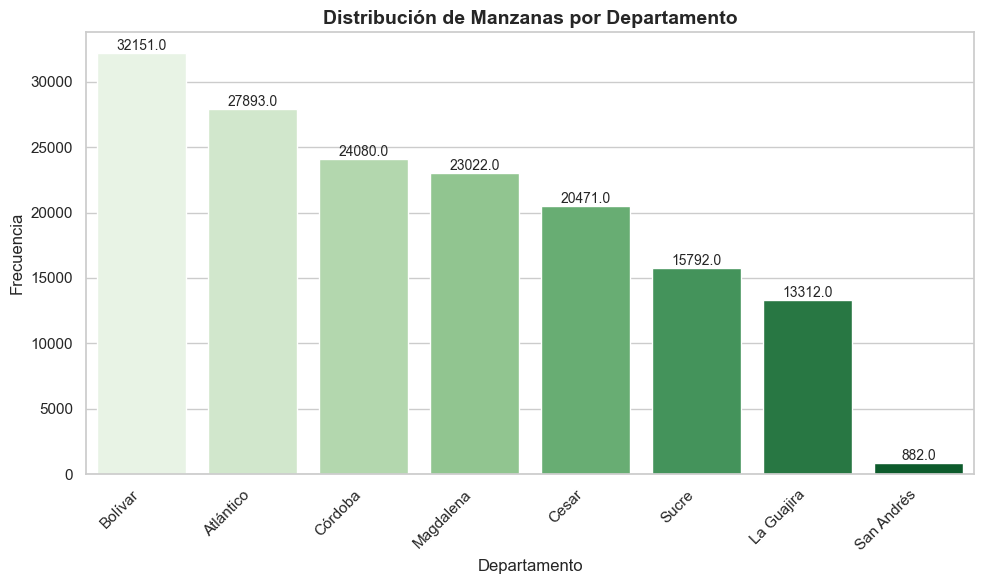

In [15]:
graficar_countplot(manzanas_caribe, 'dpto_ccdgo', 'Distribución de Manzanas por Departamento', 'Departamento')

### **Distribución de cantidad de viviendas por manzana**

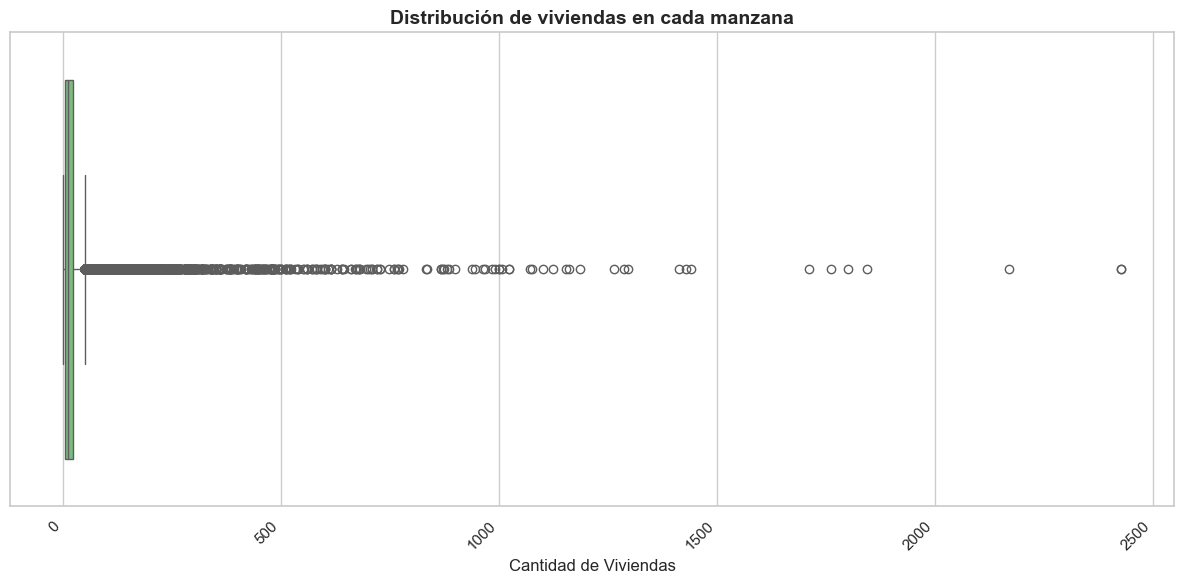

In [16]:
boxplot_por_categoria(manzanas_caribe, 'manz_viv', 'Distribución de viviendas en cada manzana', 'Cantidad de Viviendas')

## **Mapa de ejemplo: Atlántico**

In [32]:
manzanas = manzanas[manzanas["dpto_ccdgo"] == "08"]

#  Crear mapa base centrado en Atlántico
m = folium.Map(
    location=[10.95, -74.8],
    zoom_start=10,
    tiles='CartoDB positron' 
)

# Estilo para los bordes de las manzanas
style_function = lambda feature: {
    'fillColor': 'red',
    'color': '#521989',
    'weight': 1,
    'fillOpacity': 0.0,
    'opacity': 0.8
}

# Tooltip con información clave
tooltip = GeoJsonTooltip(
    fields=['manz_ccnct', 'manz_tipo', 'manz_viv'],
    aliases=['Manzana:', 'Tipo:', 'Viviendas:'],
    sticky=True,
    labels=True
)

# Agregar capa de polígonos al mapa
geojson_layer = GeoJson(
    manzanas,
    name="Manzanas Atlántico",
    style_function=style_function,
    tooltip=tooltip
).add_to(m)

# Añadir control de capas
folium.LayerControl().add_to(m)
os.makedirs("map_outputs", exist_ok=True)
m.save("map_outputs/mapa_manzanas_atlantico.html")